<a href="https://colab.research.google.com/github/vedprakash226/VisionVerse/blob/main/EdgeDetection_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from IPython.display import Image


In [ ]:
uploaded = files.upload()

Saving 2.jpeg to 2.jpeg
Saving 3.jpeg to 3.jpeg
Saving 4.jpg to 4.jpg


In [ ]:
img1 = cv2.imread('2.jpeg')
img2 = cv2.imread('3.jpeg')
img3 = cv2.imread('4.jpg')

images = np.array([img1, img2, img3])

<ipython-input-3-1a53811869d8>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array([img1, img2, img3])


In [ ]:
def display_images(original, edges):
    plt.figure(figsize=(12, 7))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
    plt.title('After Edge Detection')
    plt.axis("off")

    plt.show()

# **Canny Edge Detection**


In [ ]:
def canny_edge(img):
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)    #to remove noise
    edges = cv2.Canny(img_blur, 40, 70)
    return edges


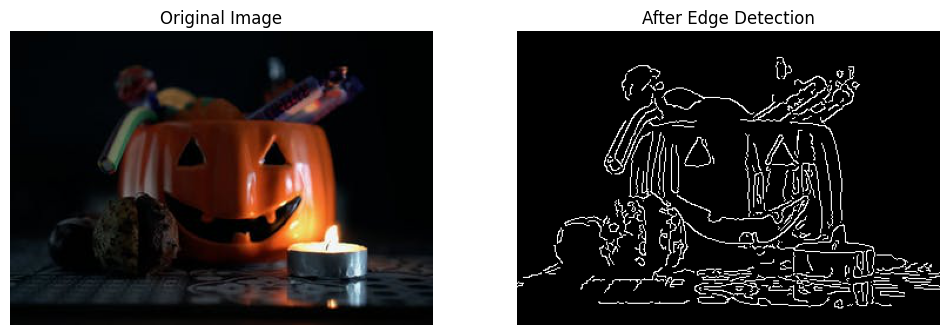

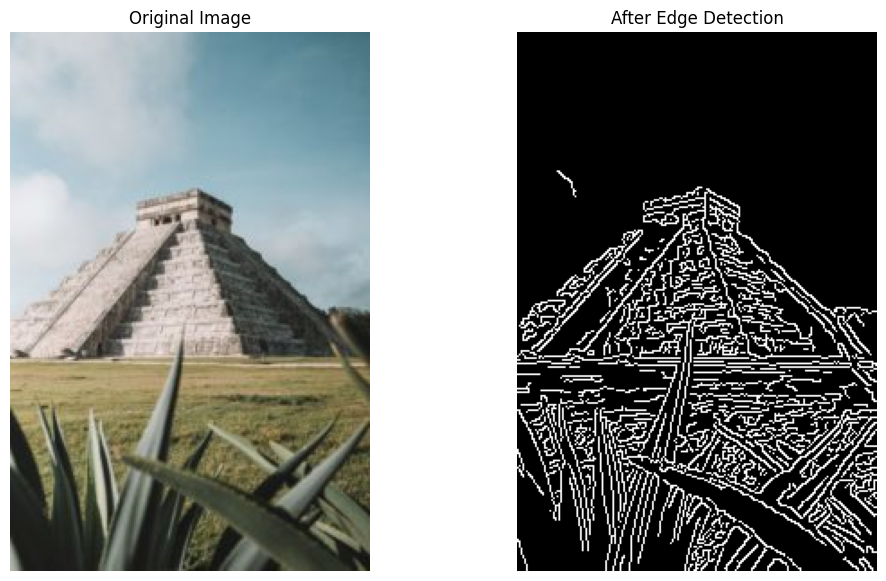

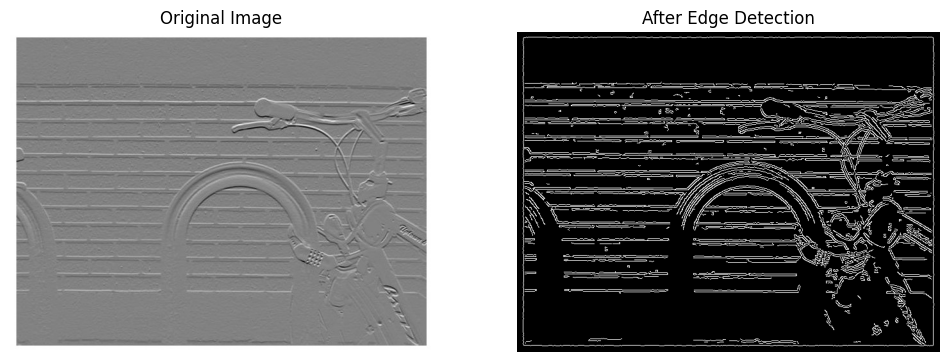

In [ ]:
for img in images:
    edge = canny_edge(img)
    display_images(img,edge)

# **Hough Transform**

In [ ]:
def hough_transform(img):
    img2 = img.copy()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    #making b/w
    img_blur = cv2.GaussianBlur(gray, (3, 3), 0)
    edges = cv2.Canny(img_blur, 50, 150, apertureSize=3)    #edge detection using canny

    # Hough Transform for lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=50, minLineLength = 5 , maxLineGap=10)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(img2, (x1,y1), (x2, y2),(255,0,0),1)


    # Hough Transform for circles
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=25, param2=30, minRadius=12, maxRadius=40)
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for circle in circles[0, :]:
            center = (circle[0], circle[1])
            radius = circle[2]
            cv2.circle(img2, center, radius, (0, 255, 0), 1)

    return img2

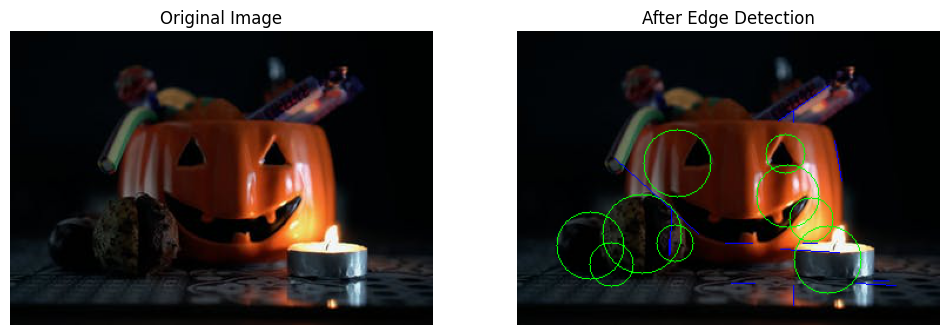

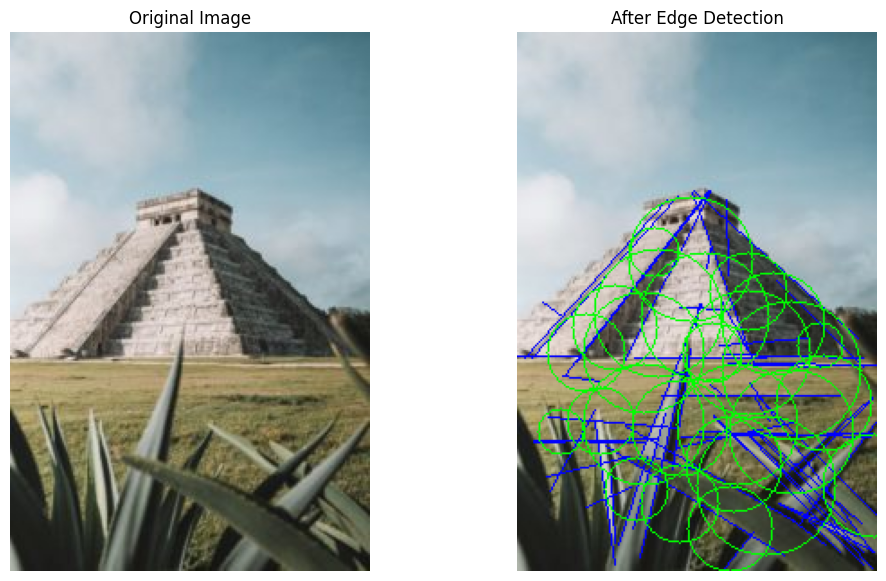

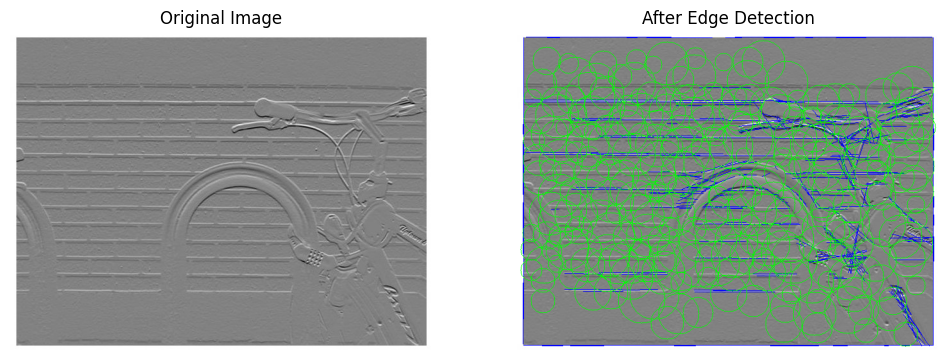

In [ ]:
for img in images:
    edge = hough_transform(img)
    display_images(img,edge)

# **Laplacian**

In [ ]:
def laplacian(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3),0)
    img_laplacian = cv2.Laplacian(blur, cv2.CV_64F)
    img_laplacian = np.uint8(np.absolute(img_laplacian))
    return img_laplacian

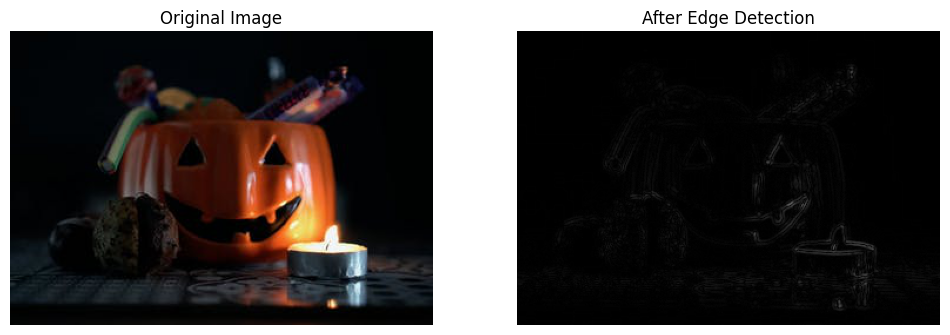

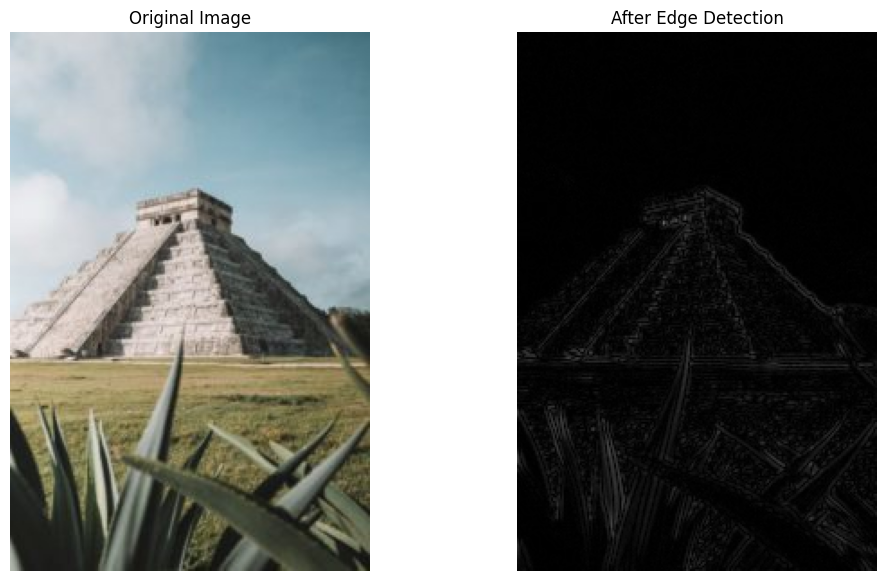

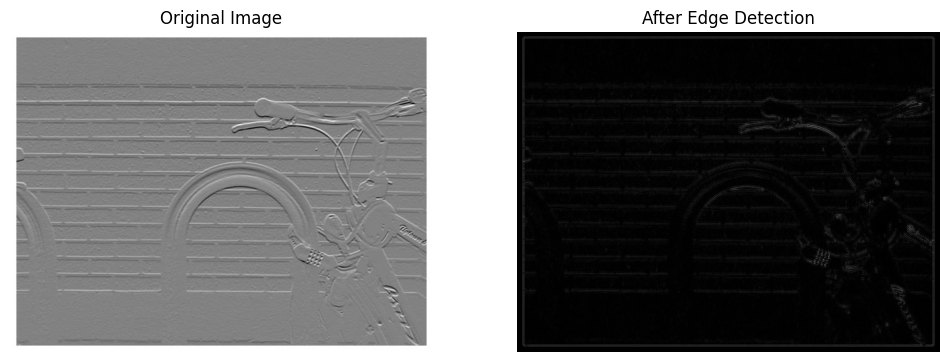

In [ ]:
for img in images:
    edge = laplacian(img)
    display_images(img,edge)

# **Sobel Gradient**

In [ ]:
def sobel(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3),0)
    img_sobel_x = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
    img_sobel_y = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)
    img_sobel = np.sqrt(img_sobel_x**2 + img_sobel_y**2)
    img_sobel = np.uint8(img_sobel)
    return img_sobel

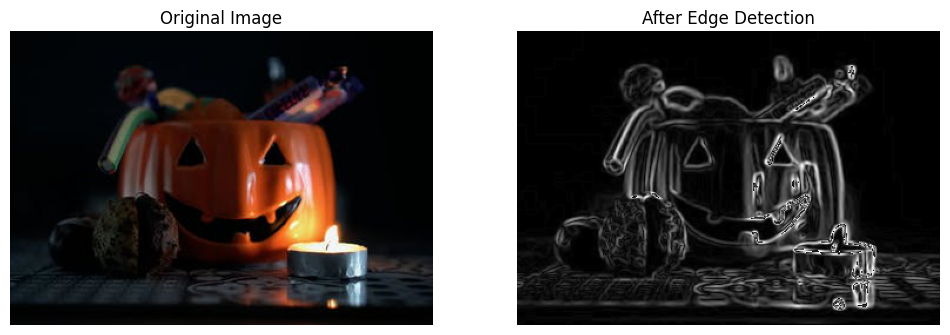

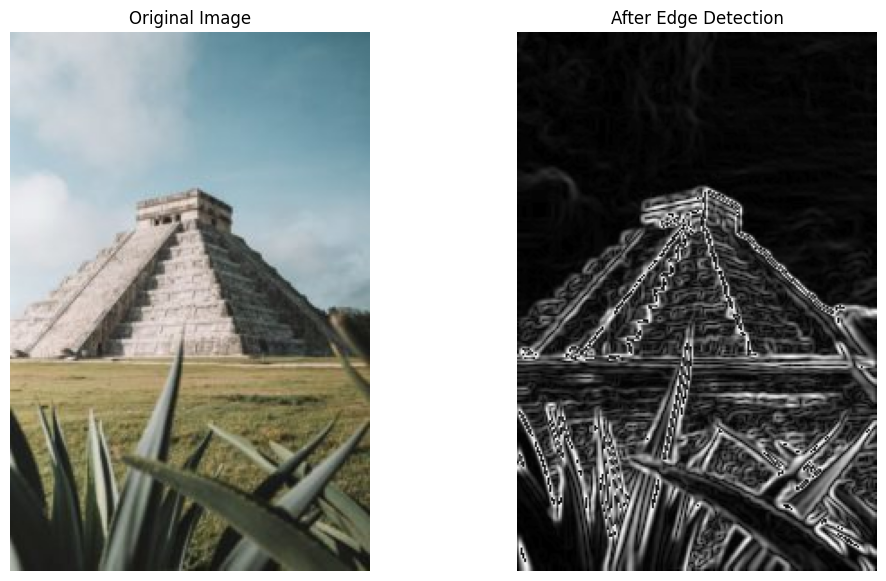

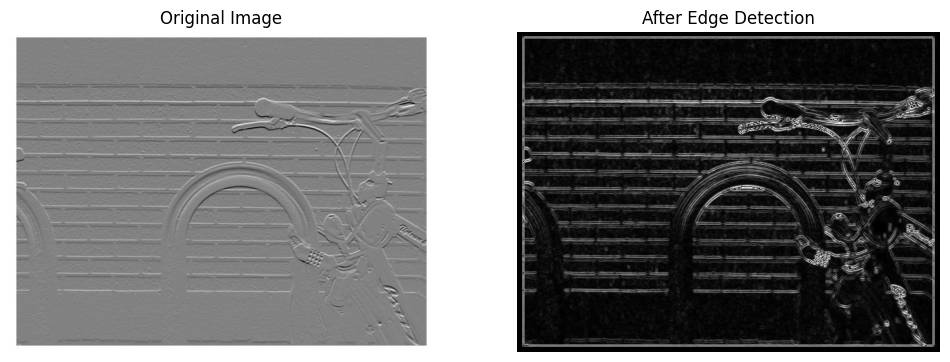

In [ ]:
for img in images:
  edge = sobel(img)
  display_images(img, edge)

In [ ]:
def prewitt(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (3,3),0)

    x_kernel = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    y_kernel = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

    x_ans = cv2.filter2D(blur, -1, x_kernel)
    y_ans = cv2.filter2D(blur, -1, y_kernel)

    overall = np.sqrt(x_ans**2 + y_ans**2)

    return np.uint8(overall)

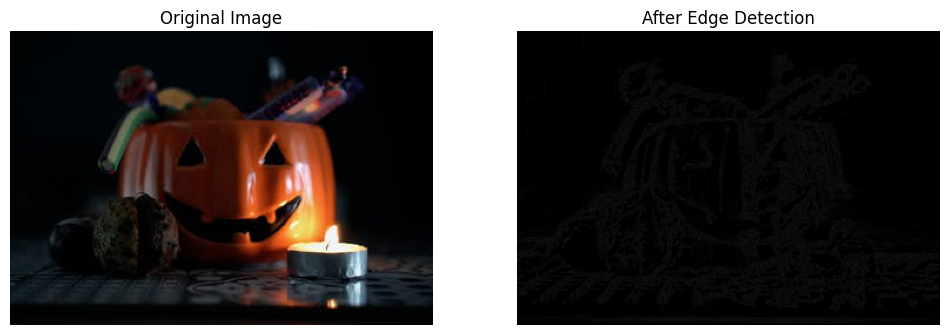

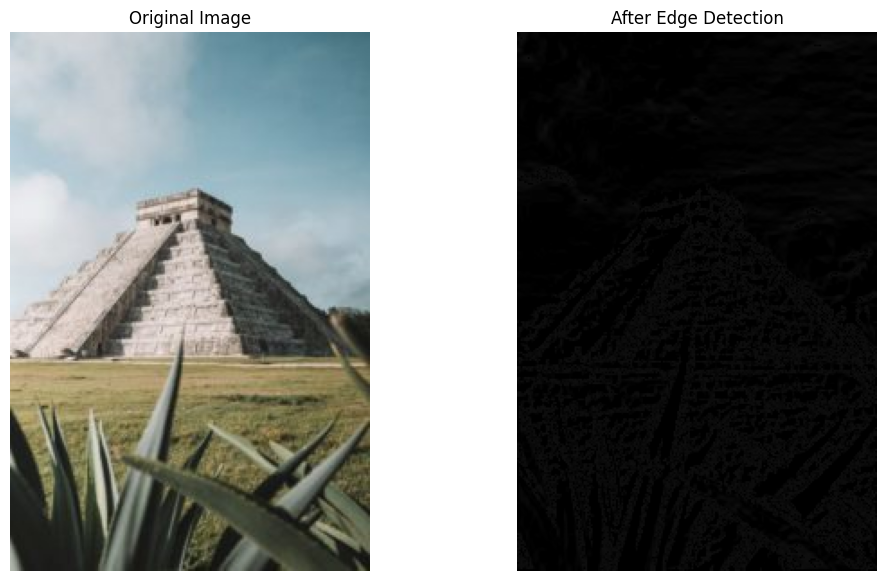

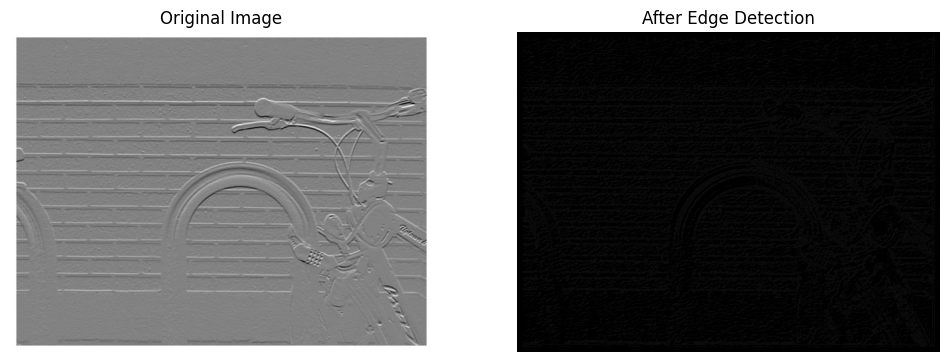

In [ ]:
for img in images:
    edge = prewitt(img)
    display_images(img, edge)

# **Robert Edge Detector**

In [ ]:
def robert(img):
    gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    x_kernel = np.array([[1, 0],[0,-1]])
    y_kernel = np.array([[0,1],[-1,0]])

    x_ans  = cv2.filter2D(gray ,cv2.CV_64F, x_kernel)
    y_ans  = cv2.filter2D(gray ,cv2.CV_64F, y_kernel)

    overall = np.sqrt(x_ans**2 + y_ans**2)
    overall = np.uint8(overall)
    return overall

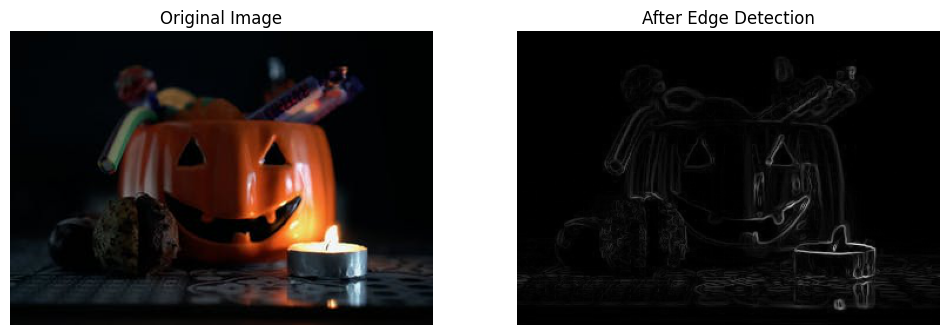

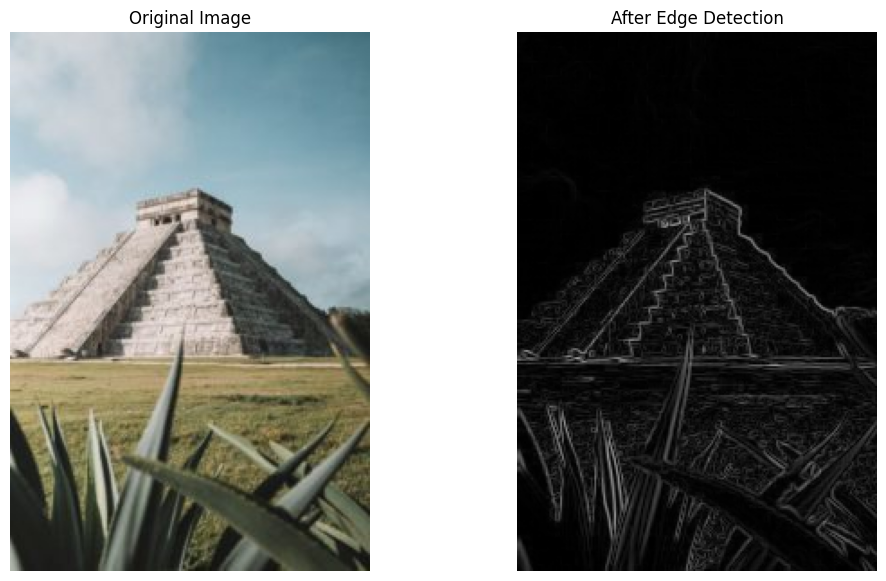

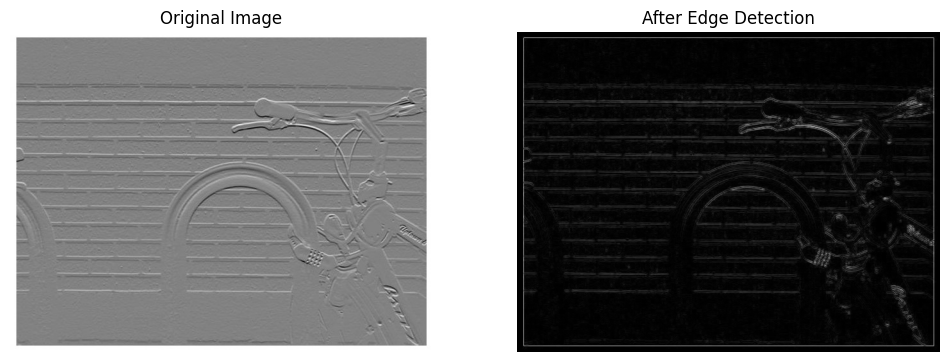

In [ ]:
for img in images:
    edge = robert(img)
    display_images(img, edge)

**According to me Robert Gradient Edge Detector gives the best result in all the methods**